In [5]:
!pip install beautifulsoup4


In [933]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import re
import urllib.parse
import matplotlib.pyplot as plt
import numpy as np

In [1090]:
df = pd.read_csv("ffkkmo_dump.csv")

In [1091]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24838 entries, 0 to 24837
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24838 non-null  int64 
 1   title        24838 non-null  object
 2   date         24838 non-null  object
 3   place        24838 non-null  object
 4   online_link  24838 non-null  object
 5   category     24838 non-null  object
 6   rank         24838 non-null  object
 7   name         24838 non-null  object
 8   club         24837 non-null  object
 9   points       24838 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.9+ MB


In [1092]:
df = df.drop(df[df['rank'].isin(['WD', 'FNR', 'DSQ', '0'])].index)
df['rank'] = df['rank'].astype('int64')
df['points'] = df['points'].astype('float')
df['date'] = df['date'].str.strip()
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [1159]:
def replace_duplicates(df, keyword, name):
    uniquenames = [ s for s in df.club.unique() if keyword.findall(str(s).lower()) ]
    return df['club'].replace(uniquenames, name)

In [1168]:
def get_regex_cat(num, cat, gender):
    return re.compile((r"(" + num + ")(?s:.*?)(" + cat + ")(?s:.*?)(" + gender + ")").lower())

In [1094]:
def get_regex_club(city, club):
    return re.compile((r"(" + club + ")(?s:.*?)(" + city + ")|(" + city + ")(?s:.*?)(" + club + ")").lower())

In [1095]:
[ s for s in df.club.unique() if get_regex_club('Павлов', '').findall(str(s).lower()) ]

['г.о. Павловский Посад, МУ ДО ДЮСШ',
 'МУДО ДЮСШ г.о. Павловский Посад',
 'г.о Павловский Посад МУДО ДЮСШ',
 'г.о. Павловский Посад, МУДО ДЮСШ',
 'МУДО ДЮСШ  Павловский Посад',
 'г., Павловский Посад, МУДО ДЮСШ',
 'Московская область, Павловский Посад, ДЮСШ',
 'МУДО ДЮСШ Павловский Посад, г. Павловский Посад',
 'МУДО ДЮСШ, г. Павловский Посад',
 'Московская область, Павловский Посад, МУДО ДЮСШ',
 'г.о. Павловский Посад МУДО ДЮСШ',
 'г. Павловский Посад, МУДО ДЮСШ',
 'г.о. Павловский Посад, МУДО СШ',
 'г.о. Павловский Посад, МУ ДО СШ',
 'МУДО СШ Павловский Посад',
 'Московская область, Павловский Посад, МУДО СШ',
 'г.о Павловский-Посад, МУДО СШ',
 'г.о. Павлово-Посадсий, МУДО СШ',
 'г.  Павловский Посад, МУДО СШ',
 'МУДО СШ г.о Павловский посад',
 'г. Павловский Посад, МУДО СШ П. Посад',
 'г.о. Павловский-Посад, МУДО СШ',
 'г.о. Павлово-Посадский,  МУДО СШ',
 'г.о.Павлово – Посадский, МУДО СШ',
 'г.о. Павлово-Посадский, МУДО СШ',
 'г.о. Павлово-Посадский, МУ ДО Ленский стадион',
 'МУДО

In [1096]:
len(df['club'].unique())

1258

In [1097]:
df['club'] = replace_duplicates(df, get_regex_club('', 'Ляпкина'), 'г.о. Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»')
df['club'] = replace_duplicates(df, get_regex_club('', 'Ляпкна'), 'г.о. Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»')
df['club'] = replace_duplicates(df, get_regex_club('', 'Голден'), 'г.о. Балашиха, СКФК «Голден Стар»')
df['club'] = replace_duplicates(df, get_regex_club('Балашиха', 'Олимп'), "г.о. Балашиха, АНО ДЮСШ «Олимп»")
df['club'] = replace_duplicates(df, get_regex_club('Мытищи', 'Авангард'), 'г.о. Мытищи, МБУ ДО «СШ «Авангард»')
df['club'] = replace_duplicates(df, get_regex_club('Королев', 'Варяг'), 'г. Королев, СК «Варяг»')
df['club'] = replace_duplicates(df, get_regex_club('Королёв', 'Варяг'), 'г. Королев, СК «Варяг»')
df['club'] = replace_duplicates(df, get_regex_club('Королев', 'Спортивн'), 'г. Королев, МБУ «Спортивные Сооружения»')
df['club'] = replace_duplicates(df, get_regex_club('Королёв', 'Спортивн'), 'г. Королев, МБУ «Спортивные Сооружения»')
df['club'] = replace_duplicates(df, get_regex_club('', 'Наши Надежды'), 'г.о. Красногорск, АНО ДО АФК «Наши Надежды»')
df['club'] = replace_duplicates(df, get_regex_club('', 'пахом'), 'г.о. Химки, АНО ДО «СШФК памяти Л.А. Пахомовой»')
df['club'] = replace_duplicates(df, get_regex_club('Наро-Фоминск', 'СШ'), 'г.о. Наро-Фоминский, МАУ ДО ЦСШ №1')
df['club'] = replace_duplicates(df, get_regex_club('Наро-Фоминск', 'Галактика'), 'г.о. Наро-Фоминск, ООО СКФК «Галактика»')
df['club'] = replace_duplicates(df, get_regex_club('Красногорск', 'Давыдов'), 'г.о. Красногорск, ИП Давыдов')
df['club'] = replace_duplicates(df, get_regex_club('Красногорск', 'КСШОР'), 'г.о. Красногорск, МБУ КСШОР "Зоркий"')
df['club'] = replace_duplicates(df, get_regex_club('', 'Зоркий'), 'г.о. Красногорск, МБУ КСШОР "Зоркий"')
df['club'] = replace_duplicates(df, get_regex_club('Красногорск', 'Снежком'), 'г.о. Красногорск, ЦФМ «Снежком»')
df['club'] = replace_duplicates(df, get_regex_club('Красногорск', 'Снеж.ком'), 'г.о. Красногорск, ЦФМ «Снежком»')
df['club'] = replace_duplicates(df, get_regex_club('Красногорск', 'ЦФМ'), 'г.о. Красногорск, ЦФМ «Снежком»')
df['club'] = replace_duplicates(df, get_regex_club('Красногорск', 'DAVYDOV'), 'г.о. Красногорск, START TEAM DAVYDOV')
df['club'] = replace_duplicates(df, get_regex_club('Красногорск', 'Козачинский'), 'г.о. Красногорск, ИП Козачинский')
df['club'] = replace_duplicates(df, get_regex_club('Красногорск', 'Вербилло'), 'г.о. Красногорск, ИП Вербилло')
df['club'] = replace_duplicates(df, get_regex_club('Красногорск', 'Вербило'), 'г.о. Красногорск, ИП Вербилло')
df['club'] = replace_duplicates(df, get_regex_club('Красногорск', 'Путь к успеху'), 'г.о. Красногорск, Союз МС Школа «Путь к успеху»')
df['club'] = replace_duplicates(df, get_regex_club('Красногорск', 'Эдвайс'), 'г.о. Красногорск, «ООО НК Эдвайс»')
df['club'] = replace_duplicates(df, get_regex_club('Люберцы', 'КСШОР'), 'г.о. Люберцы, МУДО КСШОР')
df['club'] = replace_duplicates(df, get_regex_club('Люберцы', 'Армия'), "г.о. Люберцы, СК «Армия фигурного катания»")
df['club'] = replace_duplicates(df, get_regex_club('Лыткарино', ''), "г.о. Лыткарино, МАУ «ЛСК Лыткарино»")
df['club'] = replace_duplicates(df, get_regex_club('Ступино', 'Боброва'), "г. Ступино, МБУ ДО «СШОР им. В.Б. Боброва»")
df['club'] = replace_duplicates(df, get_regex_club('Щелково', ''), "г.о. Щелково, МАУ ГОЩ «ФОК «Ледовая арена» им. В.А. Третьяка")
df['club'] = replace_duplicates(df, get_regex_club('Щёлково', ''), "г.о. Щелково, МАУ ГОЩ «ФОК «Ледовая арена» им. В.А. Третьяка")
df['club'] = replace_duplicates(df, get_regex_club('Подольск', 'Витязь'), "г.о. Подольск, МУ ДО СШОР «Витязь»")
df['club'] = replace_duplicates(df, get_regex_club('Подольск', 'Арена'), "г.о. Подольск, ШФК «Арена»")
df['club'] = replace_duplicates(df, get_regex_club('Подольск', 'Слуцкой'), "г.о. Подольск, ШФК Слуцкой")
df['club'] = replace_duplicates(df, get_regex_club('Чехов', 'Витязь'), "г.о. Чехов, МАУ «СШ «Витязь» им. В.И. Васильева")
df['club'] = replace_duplicates(df, get_regex_club('Чехов', 'Спарта'), "МАУ «СШ «Спарта»")
df['club'] = replace_duplicates(df, get_regex_club('', 'СЛУ-ГРУПП'), "г.о. Подольск, ООО «СЛУ-ГРУПП»")
df['club'] = replace_duplicates(df, get_regex_club('', 'Заречье'), "п. Заречье, ДЮСШ фигурного катания Ирины Слуцкой")
df['club'] = replace_duplicates(df, get_regex_club('', 'Лидер'), "г.о. Ивантеевка, МАУ ДО «СШ «Лидер»")
df['club'] = replace_duplicates(df, get_regex_club('', 'Салют'), "г.о. Долгопрудный, АУ «ФСК-Салют»")
df['club'] = replace_duplicates(df, get_regex_club('', 'альфа'), "г.о. Долгопрудный, СК «Альфа»")
df['club'] = replace_duplicates(df, get_regex_club('', 'Смирнова'), "г.о. Долгопрудный, АНО ДО СШФК «Смирнова Тим»")
df['club'] = replace_duplicates(df, get_regex_club('Клин', ''), "г. Клин, МБУ ДО СШОР «Клин спортивный»")
df['club'] = replace_duplicates(df, get_regex_club('Реутов', ''), "г.о. Реутов, Центр хоккея и фигурного катания «Айс Про»")
df['club'] = replace_duplicates(df, get_regex_club('', 'Айс Про'), "г.о. Реутов, Центр хоккея и фигурного катания «Айс Про»")
df['club'] = replace_duplicates(df, get_regex_club('', 'Ангелы'), "г.о. Одинцово, ООО «АФК «Ангелы Плющенко»")
df['club'] = replace_duplicates(df, get_regex_club('Одинцово', 'СШ'), "г.о. Одинцово, МБУ ДО СШ «Одинцово»")
df['club'] = replace_duplicates(df, get_regex_club('Одинцово', 'МБУС'), "г.о. Одинцово, МБУ ДО СШ «Одинцово»")
df['club'] = replace_duplicates(df, get_regex_club('Лобня', 'ЦФК'), "г.о. Лобня, МБУ «ЦФКиС»")
df['club'] = replace_duplicates(df, get_regex_club('Лобня', 'Дети'), "г.о. Лобня, СК ФК «Дети – наше будущее»")
df['club'] = replace_duplicates(df, get_regex_club('Лобня', 'Центр'), "г.о. Лобня, МБУ «ЦФКиС»")
df['club'] = replace_duplicates(df, get_regex_club('Лобня', 'УФК'), "г.о. Лобня, МБУ «ЦФКиС»")
df['club'] = replace_duplicates(df, get_regex_club('г.Лобня', ''), "г.о. Лобня, МБУ «ЦФКиС»")
df['club'] = replace_duplicates(df, get_regex_club('', 'Арктика'), 'г.о. Ленинский, АНО «ЦОСБЛ и ТК»')
df['club'] = replace_duplicates(df, get_regex_club('Видное', 'Центр'), "г.о. Ленинский, ООО «Центр спортивных технологий»")
df['club'] = replace_duplicates(df, get_regex_club('Видное', 'ЦСТ'), "г.о. Ленинский, ООО «Центр спортивных технологий»")
df['club'] = replace_duplicates(df, get_regex_club('Ленинский', 'ЦСТ'), "г.о. Ленинский, ООО «Центр спортивных технологий»")
df['club'] = replace_duplicates(df, get_regex_club('Ленинский', 'Центр'), "г.о. Ленинский, ООО «Центр спортивных технологий»")
df['club'] = replace_duplicates(df, get_regex_club('Видное', 'ЦОСБЛ'), "г.о. Ленинский, АНО «ЦОСБЛ и ТК»")
df['club'] = replace_duplicates(df, get_regex_club('Ленинский', 'ЦОСБЛ'), "г.о. Ленинский, АНО «ЦОСБЛ и ТК»")
df['club'] = replace_duplicates(df, get_regex_club('Можайск', ''), "г.о. Можайск, МУ «МДС «Багратион»")
df['club'] = replace_duplicates(df, get_regex_club('Электросталь', 'Стальной'), "г. Электросталь, СКФК «Стальной конек»")
df['club'] = replace_duplicates(df, get_regex_club('', 'Стальной конек'), "г. Электросталь, СКФК «Стальной конек»")
df['club'] = replace_duplicates(df, get_regex_club('', 'Кристалл'), "г. Электросталь, МБУДО «СШОР «Кристалл-Восток»")
df['club'] = replace_duplicates(df, get_regex_club('', 'ВОСТОК'), "г. Электросталь, МБУДО «СШОР «Кристалл-Восток»")
df['club'] = replace_duplicates(df, get_regex_club('Электросталь', 'ангел'), "г. Электросталь, ООО «КФК «Ледяной ангел»")
df['club'] = replace_duplicates(df, get_regex_club('Электросталь', 'Мартынова'), "г. Электросталь, ИП Мартынова")
df['club'] = replace_duplicates(df, get_regex_club('Селятино', 'Юность'), "п. Селятино, МАУ СШ №2 «Юность»")
df['club'] = replace_duplicates(df, get_regex_club('Раменское', ''), "г.о. Раменское, МБУ ДО «СШ «Раменское»")
df['club'] = replace_duplicates(df, get_regex_club('Люберцы', 'ХРУСТАЛЬНЫЙ'), "г.о. Люберцы, ООО «Хрустальный лёд»")
df['club'] = replace_duplicates(df, get_regex_club('Серги', 'Центр'), "г.о. Сергиев Посад, МБУ ДО СШ «Центр»")
df['club'] = replace_duplicates(df, get_regex_club('Серги', 'ХРУСТАЛЬНЫЙ ЛЁД'), "г.о. Сергиев Посад, ООО «Хрустальный лед»")
df['club'] = replace_duplicates(df, get_regex_club('Серги', 'ХРУСТАЛЬНЫЙ ЛеД'), "г.о. Сергиев Посад, ООО «Хрустальный лед»")
df['club'] = replace_duplicates(df, get_regex_club('Серги', 'Стремление'), "г.о. Сергиев Посад, ООО «Стремление»")
df['club'] = replace_duplicates(df, get_regex_club('Домодедово', 'Спицын'), "г.о. Домодедово, ИП Спицин")
df['club'] = replace_duplicates(df, get_regex_club('Домодедово', 'Спицин'), "г.о. Домодедово, ИП Спицин")
df['club'] = replace_duplicates(df, get_regex_club('Домодедово', 'Авангард'), "г.о. Домодедово, МАУ «ГС «Авангард»")
df['club'] = replace_duplicates(df, get_regex_club('Домодедово', 'Бестемьяновой'), "г.о. Домодедово, ШФК Натальи Бестемьяновой")
df['club'] = replace_duplicates(df, get_regex_club('Коломна', 'Комета'), "г.о. Коломна, МБУ ДО СШОР «Комета»")
df['club'] = replace_duplicates(df, get_regex_club('Жуковский', 'Метеор'), "г.о. Жуковский, МБУ ДО «СШ – Центр спорта «Метеор»")
df['club'] = replace_duplicates(df, get_regex_club('Дмитров', 'Демченко'), "г.о. Дмитровский, МУ ДО «СШОР Альберта Демченко»")
df['club'] = replace_duplicates(df, get_regex_club('Дмитров', 'Карпенко'), "г.о. Дмитровский, ИП Карпенко")
df['club'] = replace_duplicates(df, get_regex_club('Павлов', ''), "г.о. Павловский Посад, МУДО ДЮСШ")
df['club'] = replace_duplicates(df, get_regex_club('Серпухов', 'Спартак'), "г. Серпухов, МАУ Стадион «Спартак»")
df['club'] = replace_duplicates(df, get_regex_club('Серпухов', 'Золотой'), "г. Серпухов, СКФК «Золотой Конёк»")
df['club'] = replace_duplicates(df, get_regex_club('Серпухов', 'Благова'), "г.Серпухов, АНО АФК им. Василия Благова")
df['club'] = replace_duplicates(df, get_regex_club('Химки', 'ЗВС'), "г.о. Химки, МАУ ДО «СШ ЗВС»")
df['club'] = replace_duplicates(df, get_regex_club('Химки', 'Бородул'), "г.о. Химки, СКФК Бородулиных")
df['club'] = replace_duplicates(df, get_regex_club('Ногинск', ''), "г. Ногинск, МБУ «СШОР»")
df['club'] = replace_duplicates(df, get_regex_club('Шаховская', ''), "г.о. Шаховская, МАУ «Шаховской ДОК»")
df['club'] = replace_duplicates(df, get_regex_club('', 'Алмазный'), "г.о. Подольск, СЦ «Алмазный лед МО»")
df['club'] = replace_duplicates(df, get_regex_club('Малаховка', ''), "г.о. Люберцы, СК «МГАФК - Малаховка»")
df['club'] = replace_duplicates(df, get_regex_club('Орехово', ''), "г. Орехово-Зуево, МУДО «СШ «Спартак Орехово»")





# df['club'] = replace_duplicates(df, get_regex_club('', ''), "")

len(df['club'].unique())

124

In [1098]:
df['year'] = df['date'].dt.year

In [1099]:
df.head()

,Unnamed: 0,title,date,place,online_link,category,rank,name,club,points,year
0,0,Межмуниципальные соревнования Московской облас...,2020-09-27,"г. Лыткарино, ул. Советская д.9а, ЛСК «Лыткарино»",http://ffkkmo.ru/events/2021/lytkarino0927/CAT...,"3 юнoшеский разряд, мaльчики",1,Валентин КРЫЛОВ,"г.о. Ивантеевка, МАУ ДО «СШ «Лидер»",15.82,2020
1,1,Межмуниципальные соревнования Московской облас...,2020-09-27,"г. Лыткарино, ул. Советская д.9а, ЛСК «Лыткарино»",http://ffkkmo.ru/events/2021/lytkarino0927/CAT...,"3 юнoшеский разряд, дeвочки",1,Елизавета ИВАНОВА,"г.о. Сергиев Посад, МБУ ДО СШ «Центр»",20.04,2020
2,2,Межмуниципальные соревнования Московской облас...,2020-09-27,"г. Лыткарино, ул. Советская д.9а, ЛСК «Лыткарино»",http://ffkkmo.ru/events/2021/lytkarino0927/CAT...,"3 юнoшеский разряд, дeвочки",2,Екатерина МУРАЕВА,"г.о. Ивантеевка, МАУ ДО «СШ «Лидер»",19.07,2020
3,3,Межмуниципальные соревнования Московской облас...,2020-09-27,"г. Лыткарино, ул. Советская д.9а, ЛСК «Лыткарино»",http://ffkkmo.ru/events/2021/lytkarino0927/CAT...,"3 юнoшеский разряд, дeвочки",3,Милана ВАСИЛЬЕВА,"г.о. Сергиев Посад, МБУ ДО СШ «Центр»",18.35,2020
4,4,Межмуниципальные соревнования Московской облас...,2020-09-27,"г. Лыткарино, ул. Советская д.9а, ЛСК «Лыткарино»",http://ffkkmo.ru/events/2021/lytkarino0927/CAT...,"3 юнoшеский разряд, дeвочки",4,Элина СОКОЛОВСКАЯ,"г.о. Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»",17.99,2020


In [1100]:
year = 2024

In [1101]:
def get_top_df(df, column, qty):
    df1 = df['club'].value_counts()
    others = df1[qty:].sum()
    df1 = df1[:qty]
    df1['Остальные'] = others
    return df1

In [1102]:
def pie_of_winners(year, rank, limit):
    get_top_df(df[(df['year'] == year) & (df['rank'] <= rank)], 'club', limit).plot.pie(
        autopct='%1.f%%', 
        legend=False,
        wedgeprops = {"edgecolor" : "white", 
                      'linewidth': 2,
                      'antialiased': True});
    plt.title(f'Доля победителей в {year} году', fontsize=16)
    plt.xlabel('', fontsize=18)
    plt.ylabel('', fontsize=18)

In [1112]:
def participants_for_club_in_year(year, club, limit, plot=True):
    data = df[(df['year'] == year) & (df['club'] == club)].groupby('name').count().sort_values(
        by='name', ascending=True).head(limit)['title']
    if plot:
        ax = data.plot(
            kind='bar', figsize=(20, 5), grid=True
        )
        major_ticks = np.arange(0, max(data) + 1, 1)
        ax.set_yticks(major_ticks)
        plt.title(club, fontsize=32)
        plt.xlabel('Спортсмен', fontsize=16)
        plt.ylabel(f'Количество участий в {year} году', fontsize=18)
        plt.xticks(fontsize=20, rotation=50, horizontalalignment='right');
    else:
        return data

In [1104]:
def plot_clubs_in_year(year, limit):
    df[df['year'] == year].groupby('club').count().sort_values(by='title', ascending=False)['title'].head(limit).plot(
        kind='bar', figsize=(20, 5), grid=True
    )
    plt.title(f'Распределение количества участий школ в {year} году', fontsize=32)
    plt.xlabel('Школа', fontsize=18)
    plt.ylabel('Количество участий', fontsize=18)
    plt.xticks(fontsize=20, rotation=70, horizontalalignment='right');

In [1113]:
def sportsmens_of_clubs_in_year(year, limit, plot=True):
    tg_df = df[df['year'] == year].groupby(['club', 'name']).count().groupby('club').count().sort_values(
        by='title', ascending=False)['title'].head(limit)
    if plot:
        tg_df.plot(
            kind='bar', figsize=(25, 8), grid=True
        )
        plt.title(f'Количество спортсменов, участвовавших в официальных соревнованиях за {year} год', fontsize=32)
        plt.xlabel('Школа', fontsize=18)
        plt.ylabel('Количество спортсменов', fontsize=18)
        plt.xticks(fontsize=20, rotation=70, horizontalalignment='right');
    else:
        return tg_df

In [1106]:
def winners_of_club(year, club):
    if type(year) == int:
        year_list = [year]
    else:
        year_list = year[:]
    return df[(df['year'].isin(year_list)) & (df['rank'] <= 3) & (df['club'] == club)]

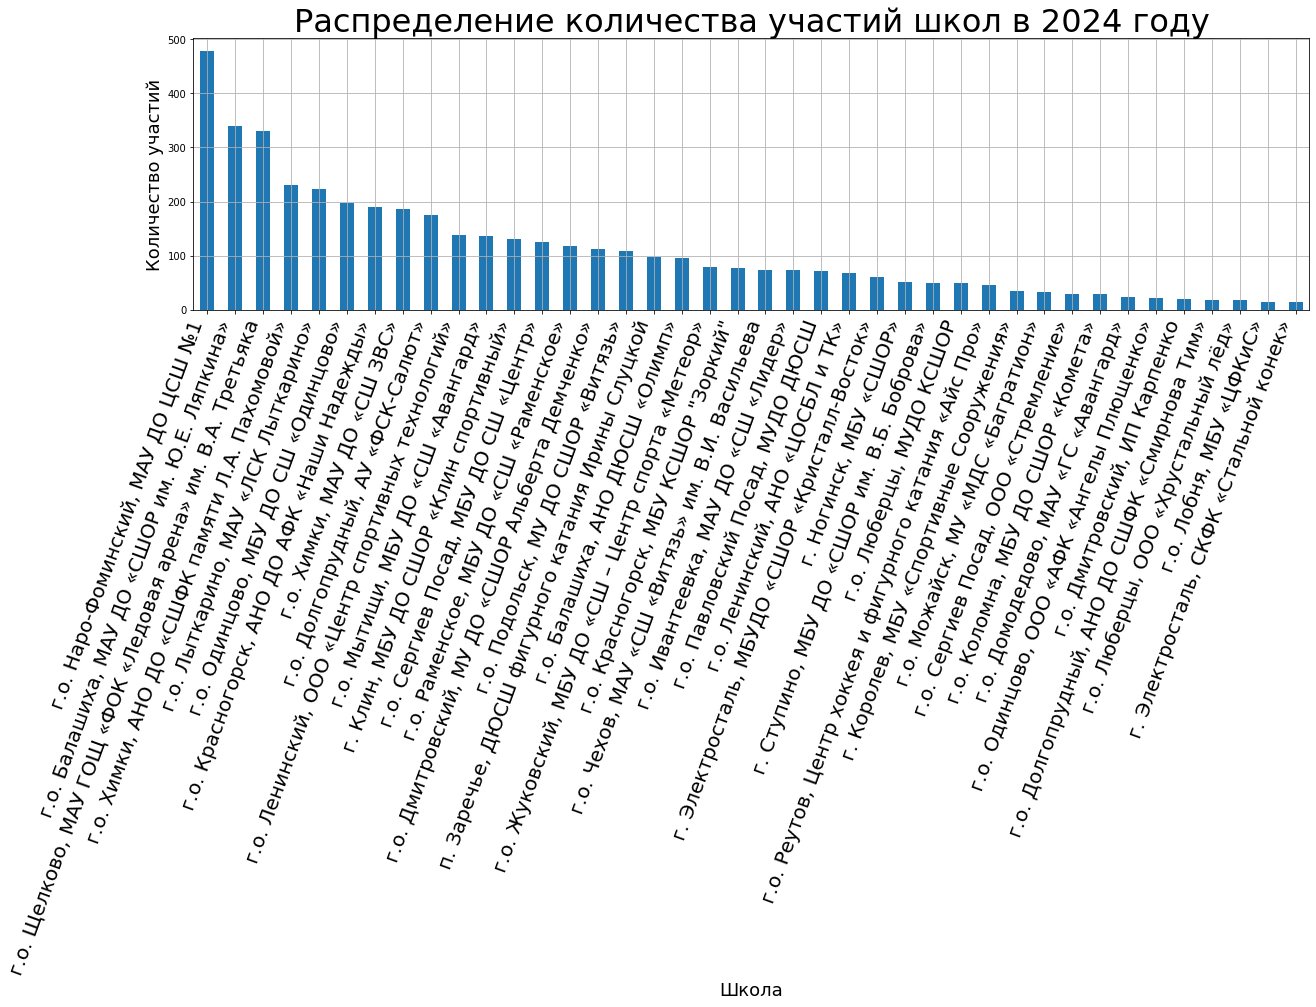

In [1107]:
plot_clubs_in_year(2024, 40)

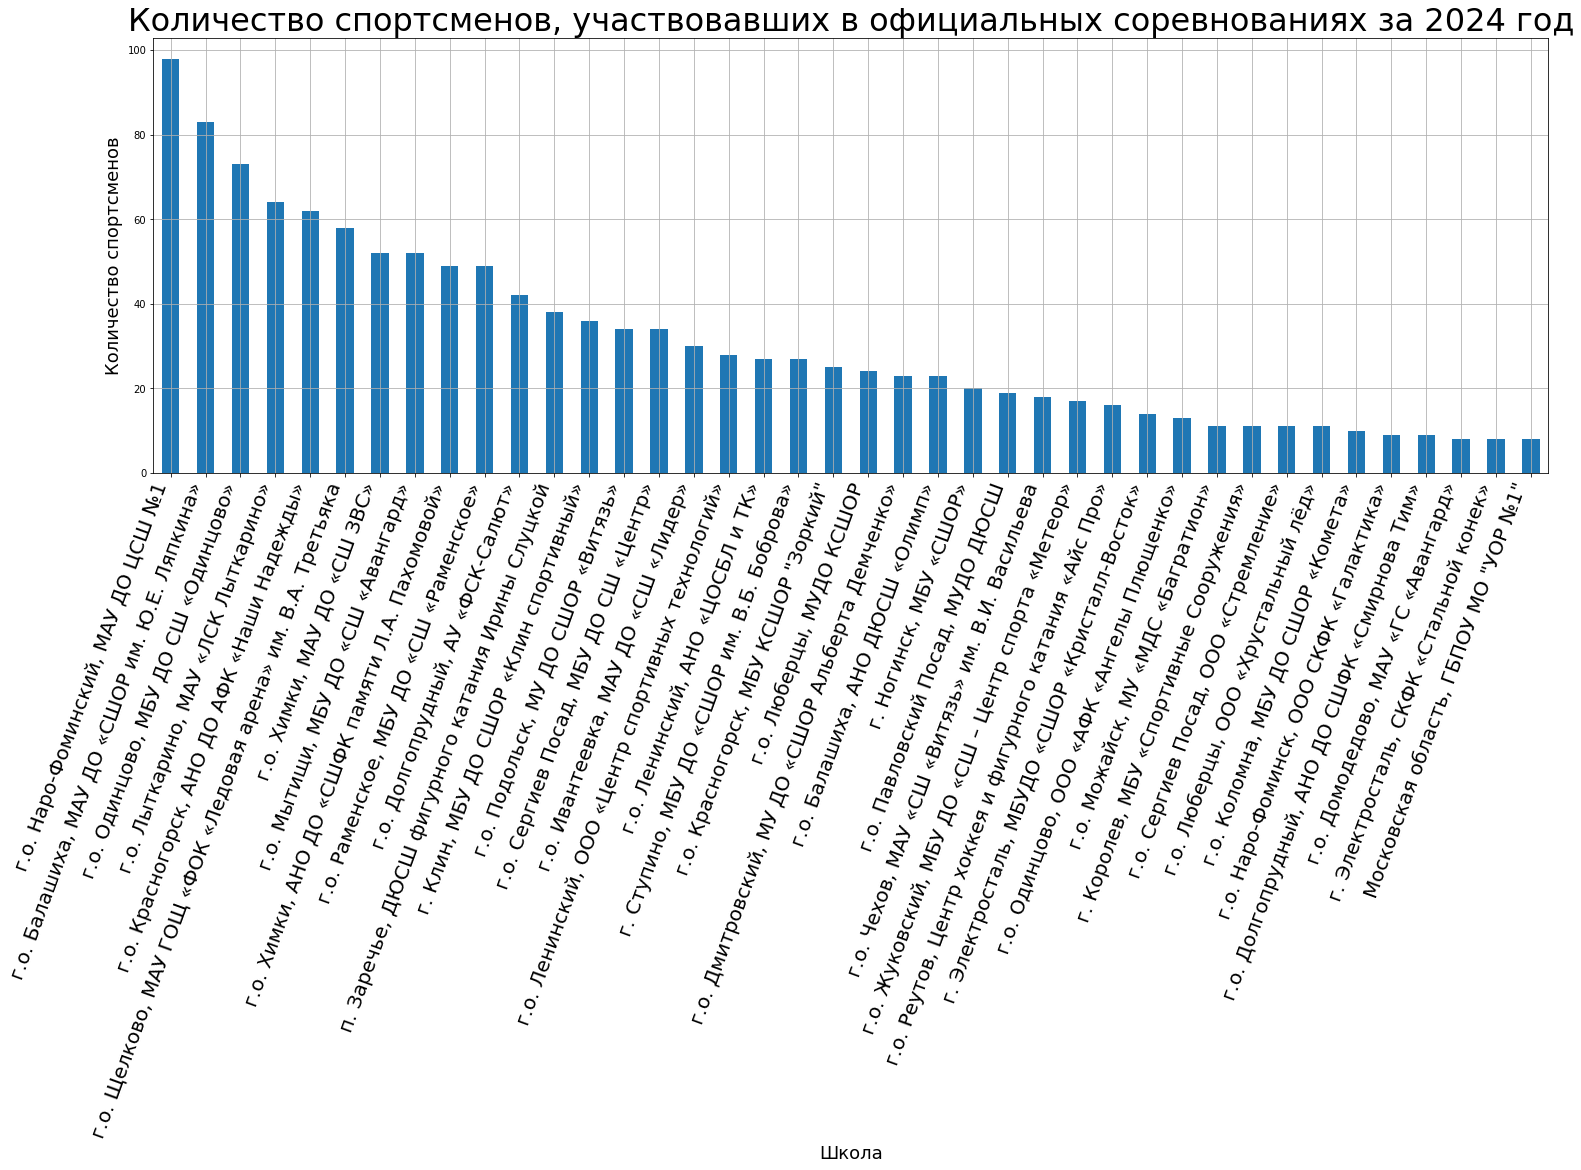

In [1108]:
sportsmens_of_clubs_in_year(2024, 40, plot=True)

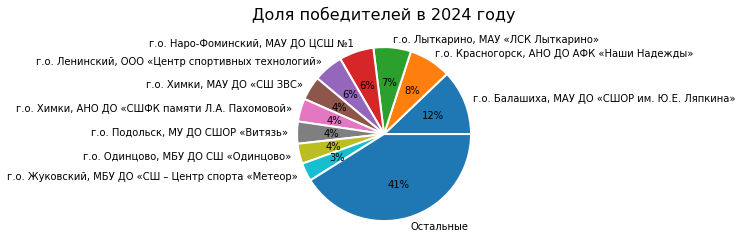

In [1109]:
pie_of_winners(2024, 3, 10)

In [1137]:
odn = "г.о. Одинцово, МБУ ДО СШ «Одинцово»"
mojaisk = "г.о. Можайск, МУ «МДС «Багратион»"
naro = 'г.о. Наро-Фоминский, МАУ ДО ЦСШ №1'
lyapkina = 'г.о. Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»'
galakt = 'г.о. Наро-Фоминск, ООО СКФК «Галактика»'
lybertsy = 'г.о. Люберцы, МУДО КСШОР'
klin = "г. Клин, МБУ ДО СШОР «Клин спортивный»"
stupino = "г. Ступино, МБУ ДО «СШОР им. В.Б. Боброва»"
lytkarino = "г.о. Лыткарино, МАУ «ЛСК Лыткарино»"
year = 2024

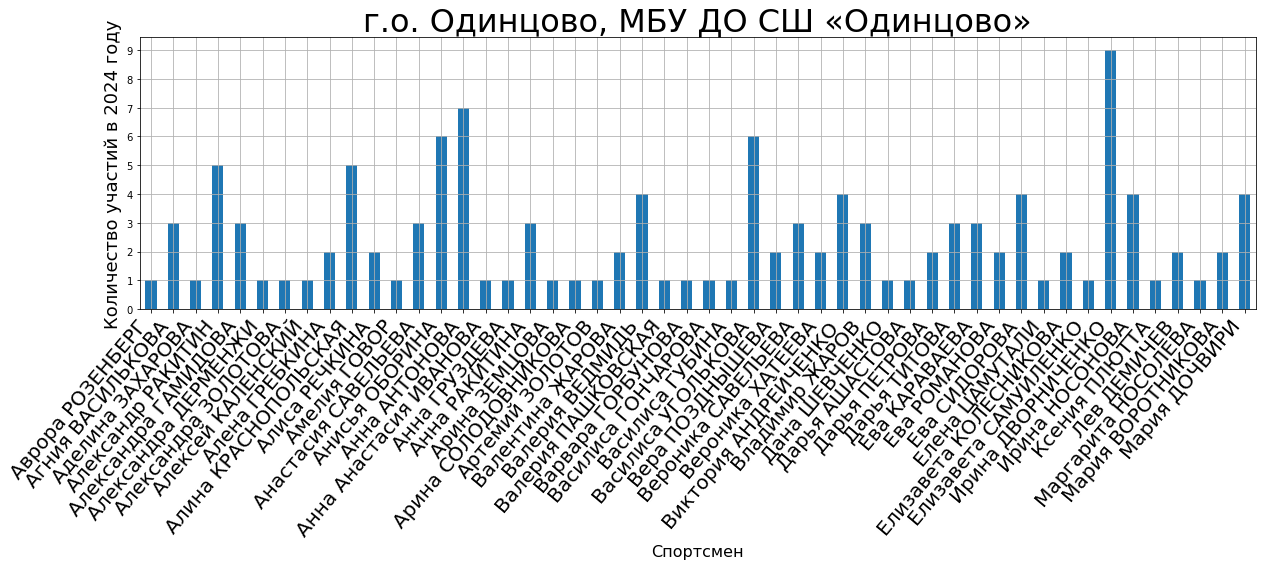

In [1140]:
participants_for_club_in_year(2024, odn, 50)

In [1050]:
def get_df_of_club_in_year(club, year):
    return df[(df['year'] == year) & (df['club'] == club)]

In [1053]:
get_df_of_club_in_year("г. Клин, МБУ ДО СШОР «Клин спортивный»", 2025).tail(30)

,Unnamed: 0,title,date,place,online_link,category,rank,name,club,points,year
24219,81,Спортивные соревнования Московской области по ...,2025-03-15,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin1503/CAT018RS...,"Юный фигуpиcт, дeвочки",1,Анастасия ЯРОЩУК,"г. Клин, МБУ ДО СШОР «Клин спортивный»",11.84,2025
24220,82,Спортивные соревнования Московской области по ...,2025-03-15,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin1503/CAT018RS...,"Юный фигуpиcт, дeвочки",2,Николь РЕПИНА,"г. Клин, МБУ ДО СШОР «Клин спортивный»",10.94,2025
24221,83,Спортивные соревнования Московской области по ...,2025-03-15,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin1503/CAT018RS...,"Юный фигуpиcт, дeвочки",3,Алиса СААКЯН,"г. Клин, МБУ ДО СШОР «Клин спортивный»",10.91,2025
24447,6,Спортивные соревнования Московской области по ...,2025-03-25,"г. Селятино, Спорткомбинат ""Строитель"" Ледовая...",http://ffkkmo.ru/events/2425/selyatino03/CAT00...,"Hoрмa Юный фигуриcт, дeвoчки",7,Варвара КОЗЛОВА,"г. Клин, МБУ ДО СШОР «Клин спортивный»",9.96,2025
24753,0,Спортивные соревнования Московской области по ...,2025-04-05,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin04/CAT002RS.HTM,"3 юношeский рaзряд, дeвочки",1,Юмабика КИРГИЗБАЕВА,"г. Клин, МБУ ДО СШОР «Клин спортивный»",15.93,2025
24754,1,Спортивные соревнования Московской области по ...,2025-04-05,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin04/CAT002RS.HTM,"3 юношeский рaзряд, дeвочки",2,Дарья СЕВАСТЬЯНОВА,"г. Клин, МБУ ДО СШОР «Клин спортивный»",14.41,2025
24755,2,Спортивные соревнования Московской области по ...,2025-04-05,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin04/CAT002RS.HTM,"3 юношeский рaзряд, дeвочки",3,Алиса ШИБКО,"г. Клин, МБУ ДО СШОР «Клин спортивный»",14.18,2025
24756,3,Спортивные соревнования Московской области по ...,2025-04-05,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin04/CAT002RS.HTM,"3 юношeский рaзряд, дeвочки",4,Гаяне ШАХВЕРДЯН,"г. Клин, МБУ ДО СШОР «Клин спортивный»",14.02,2025
24758,5,Спортивные соревнования Московской области по ...,2025-04-05,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin04/CAT002RS.HTM,"3 юношeский рaзряд, дeвочки",6,Александра РУЗИНА,"г. Клин, МБУ ДО СШОР «Клин спортивный»",13.33,2025
24759,6,Спортивные соревнования Московской области по ...,2025-04-05,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin04/CAT002RS.HTM,"3 юношeский рaзряд, дeвочки",7,Алина ТИХОМИРОВА,"г. Клин, МБУ ДО СШОР «Клин спортивный»",12.82,2025


In [1081]:
winners_of_club([2025], lytkarino).name.unique()

array(['Наталья СУХОВА', 'Илья МЕЛЬНИКОВ', 'Артемий ФРОЛОВ',
       'Таисия БЕРНАДСКАЯ', 'Алиса ВЕРХОВА', 'Александра КРУТОВА',
       'Стефания КОРОЛЬ', 'Екатерина АБРАМОВА', 'Андрей ШИЛИН',
       'Александр ИВАНИЧЕВ', 'Александра ЧУБАРА', 'Александра КЛИШИНА',
       'Арина СТРОГАНОВА', 'Полина КУРОВА', 'Полина СОЛОВЬЕВА',
       'Полина ДОЛГИХ', 'Александра ХАЛИКОВА', 'Виктория АФАНАСЬЕВА',
       'Милана ИЛЬИНА'], dtype=object)

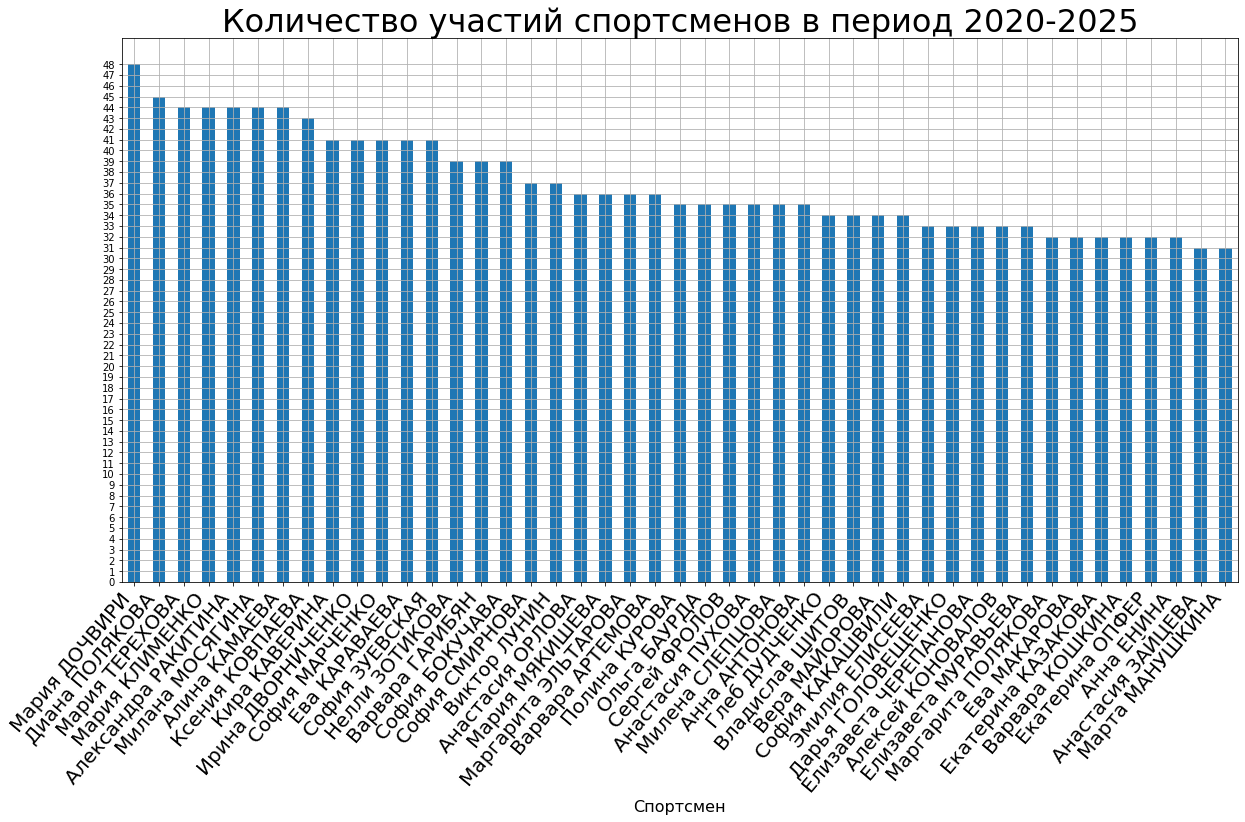

In [1247]:
data = df.groupby('name').count().sort_values(
    by='title', ascending=False).head(45)['title']
ax = data.plot(
    kind='bar', figsize=(20, 10), grid=True
)
major_ticks = np.arange(0, max(data) + 1, 1)
ax.set_yticks(major_ticks)
plt.title("Количество участий спортсменов в период 2020-2025", fontsize=32)
plt.xlabel('Спортсмен', fontsize=16)
plt.ylabel(f'', fontsize=18)
plt.xticks(fontsize=20, rotation=50, horizontalalignment='right');

In [1230]:
df[df['name'] == 'Анастасия МАКСИМОВА']

,Unnamed: 0,title,date,place,online_link,category,rank,name,club,points,year
17630,15,Спортивные соревнования Московской области по ...,2023-11-06,"г. Химки, ул. Мичурина, стр. 24, к. 1, ФОК ""Но...",http://ffkkmo.ru/events/2324/himki11/CAT002RS.HTM,"3-й юношеский разряд, девочки",15,Анастасия МАКСИМОВА,"г.о. Химки, АНО ДО «СШФК памяти Л.А. Пахомовой»",3.73,2023


In [1234]:
category_names = ["3-й юношеский разряд, мальчики",
                "3-й юношеский разряд, девочки",
                "2-й юношеский разряд, мальчики",
                "2-й юношеский разряд, девочки",
                "1-й юношеский разряд, мальчики",
                "1-й юношеский разряд, девочки",
                "3-й спортивный разряд, мальчики",
                "3-й спортивный разряд, девочки",
                "2-й спортивный разряд, мальчики",
                "2-й спортивный разряд, девочки",
                "1-й спортивный разряд, мальчики",
                "1-й спортивный разряд, девочки",
                "Юный фигурист, девочки",
                "Юный фигурист, мальчики"]

In [1244]:
df[df['category'].isin(category_names)&(df['year']==2024)].sort_values(by="points").groupby("category").last()[['place', 'date', 'name', 'points']]

,place,date,name,points
category,,,,
"1-й спортивный разряд, девочки","г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",2024-09-14,Альбина ГЕРАСИМОВА,164.76
"1-й спортивный разряд, мальчики","г.о. Клин, ул. Карла Маркса, д. 99, Ледовый дв...",2024-04-20,Дмитрий ПУСТОВАЛОВ,184.86
"1-й юношеский разряд, девочки","г. Ногинск, ул. Климова, д. 48, к. А, ФОК ""Лед...",2024-04-02,Ульяна РОЖКОВА,48.23
"1-й юношеский разряд, мальчики","г. Можайск, ул. Мира 15, ЛА ""Багратион""",2024-01-20,Артемий ФРОЛОВ,40.16
"2-й спортивный разряд, девочки","г. Ивантеевка, ул. Победы, д. 2, ФОК ЛСК ""Лидер""",2024-10-12,Елизавета НИКОЛАЕВА,134.13
"2-й спортивный разряд, мальчики","г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",2024-02-24,Максим СТИФУНИН,110.04
"2-й юношеский разряд, девочки","г. Щелково, ул. Фабричная, д. 4, Ледовая арена...",2024-03-19,Александра НЕЧАЕВА,33.30
"2-й юношеский разряд, мальчики","г. Наро-Фоминск, ул. Профсоюзная, д. 36Б, ледо...",2024-12-14,Александр КАНДИДОВ,30.17
"3-й спортивный разряд, девочки","г.о. Наро-Фоминск, г. Селятино, Спорткомбинат ...",2024-11-13,София СМИРНОВА,50.25


In [1246]:
df[df['category'].isin(category_names)&(df['year']==2024)].groupby("category").count()['title']

category
1-й спортивный разряд, девочки     392
1-й спортивный разряд, мальчики     51
1-й юношеский разряд, девочки      489
1-й юношеский разряд, мальчики      36
2-й спортивный разряд, девочки     755
2-й спортивный разряд, мальчики     26
2-й юношеский разряд, девочки      747
2-й юношеский разряд, мальчики      51
3-й спортивный разряд, девочки     717
3-й спортивный разряд, мальчики     63
3-й юношеский разряд, девочки      632
3-й юношеский разряд, мальчики      39
Юный фигурист, девочки             280
Юный фигурист, мальчики             12
Name: title, dtype: int64

In [1226]:
[ s for s in df['category'].unique() if get_regex_cat("", "ушк", "").findall(str(s).lower()) ]

['KMC, дeвушки',
 'MC, дeвушки',
 'Дeвушки',
 'Девушки, 3-й юношеский разряд',
 'KMC, девушки',
 'КМС, дeвушки',
 'МС, девушки',
 'КМС дeвушки',
 '2-й юношеский разряд, дeвушки',
 'KМС, девушки',
 '3 спopтиный рaзряд, девушки']

In [1163]:
def replace_duplicates(df, keyword, name, field='club'):
    uniquenames = [ s for s in df[field].unique() if keyword.findall(str(s).lower()) ]
    return df[field].replace(uniquenames, name)

In [1227]:
df['category'] = replace_duplicates(df, get_regex_cat("3", "юн", "м"), "3-й юношеский разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("м", "3", "юн"), "3-й юношеский разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("3", "юн", "чк"), "3-й юношеский разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("чк", "3", "юн"), "3-й юношеский разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("2", "юн", "м"), "2-й юношеский разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("м", "2", "юн"), "2-й юношеский разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("2", "юн", "чк"), "2-й юношеский разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("чк", "2", "юн"), "2-й юношеский разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("1", "юн", "м"), "1-й юношеский разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("м", "1", "юн"), "1-й юношеский разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("1", "юн", "чк"), "1-й юношеский разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("чк", "1", "юн"), "1-й юношеский разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("1", "юн", "шк"), "1-й юношеский разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("3", "вн", "м"), "3-й спортивный разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("3", "вн", "ю"), "3-й спортивный разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("м", "3", "вн"), "3-й спортивный разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("ю", "3", "вн"), "3-й спортивный разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("3", "вн", "чк"), "3-й спортивный разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("3", "вн", "шк"), "3-й спортивный разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("чк", "3", "вн"), "3-й спортивный разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("шк", "3", "вн"), "3-й спортивный разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("2", "вн", "м"), "2-й спортивный разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("2", "вн", "ю"), "2-й спортивный разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("м", "2", "вн"), "2-й спортивный разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("ю", "2", "вн"), "2-й спортивный разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("2", "вн", "чк"), "2-й спортивный разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("2", "вн", "шк"), "2-й спортивный разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("чк", "2", "вн"), "2-й спортивный разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("шк", "2", "вн"), "2-й спортивный разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("1", "вн", "м"), "1-й спортивный разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("1", "вн", "ю"), "1-й спортивный разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("м", "1", "вн"), "1-й спортивный разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("ю", "1", "вн"), "1-й спортивный разряд, мальчики", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("1", "вн", "чк"), "1-й спортивный разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("1", "вн", "шк"), "1-й спортивный разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("чк", "1", "вн"), "1-й спортивный разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("шк", "1", "вн"), "1-й спортивный разряд, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("Юны", "", "д"), "Юный фигурист, девочки", 'category')
df['category'] = replace_duplicates(df, get_regex_cat("Юны", "", "м"), "Юный фигурист, мальчики", 'category')